In [2]:
# Evaluation

In [3]:
import pandas as pd

# MMD vs. MMD_Feature

In [4]:
# Create a new DataFrame as a copy of the original
df_mmd_mmd2 = pd.read_csv('../evaluation/results.csv')

# Relabel the rules column in the new DataFrame
df_mmd_mmd2.loc[(df_mmd_mmd2['learner'] == 3) & (df_mmd_mmd2['rules'] == 'induction') & (df_mmd_mmd2['coverage'] == 0.6), 'rules'] = 'mmd2'
df_mmd_mmd2.loc[(df_mmd_mmd2['learner'] == 0) & (df_mmd_mmd2['rules'] == 'induction') & (df_mmd_mmd2['coverage'] == 0.6), 'rules'] = 'mmd'

# Filter rows where rules is either 'induction' or 'mmd2'
df_mmd_mmd2 = df_mmd_mmd2[df_mmd_mmd2['rules'].isin(['mmd', 'mmd2'])]

# df_mmd_mmd2.reset_index()
# Display the new DataFrame
# df_mmd_mmd2[df_mmd_mmd2['rules'].isin(['mmd', "mmd2"])]
# df_mmd_mmd2.head()

In [5]:
# Calculate F-score
df_mmd_mmd2['fscore'] = 2 * (df_mmd_mmd2['precision_with'] * df_mmd_mmd2['recall_with']) / (df_mmd_mmd2['precision_with'] + df_mmd_mmd2['recall_with'])
# df_mmd_mmd2.head()

In [6]:
df_mmd_mmd2.columns

Index(['run', 'blackbox', 'model', 'learner', 'rules', 'coverage', 'seed',
       'model_number', 'specificity_without', 'precision_without',
       'recall_without', 'time_without', 'and_without', 'or_without',
       'predicates_without', 'specificity_with', 'precision_with',
       'recall_with', 'time_with', 'and_with', 'or_with', 'predicates_with',
       'time_influential', 'fscore'],
      dtype='object')

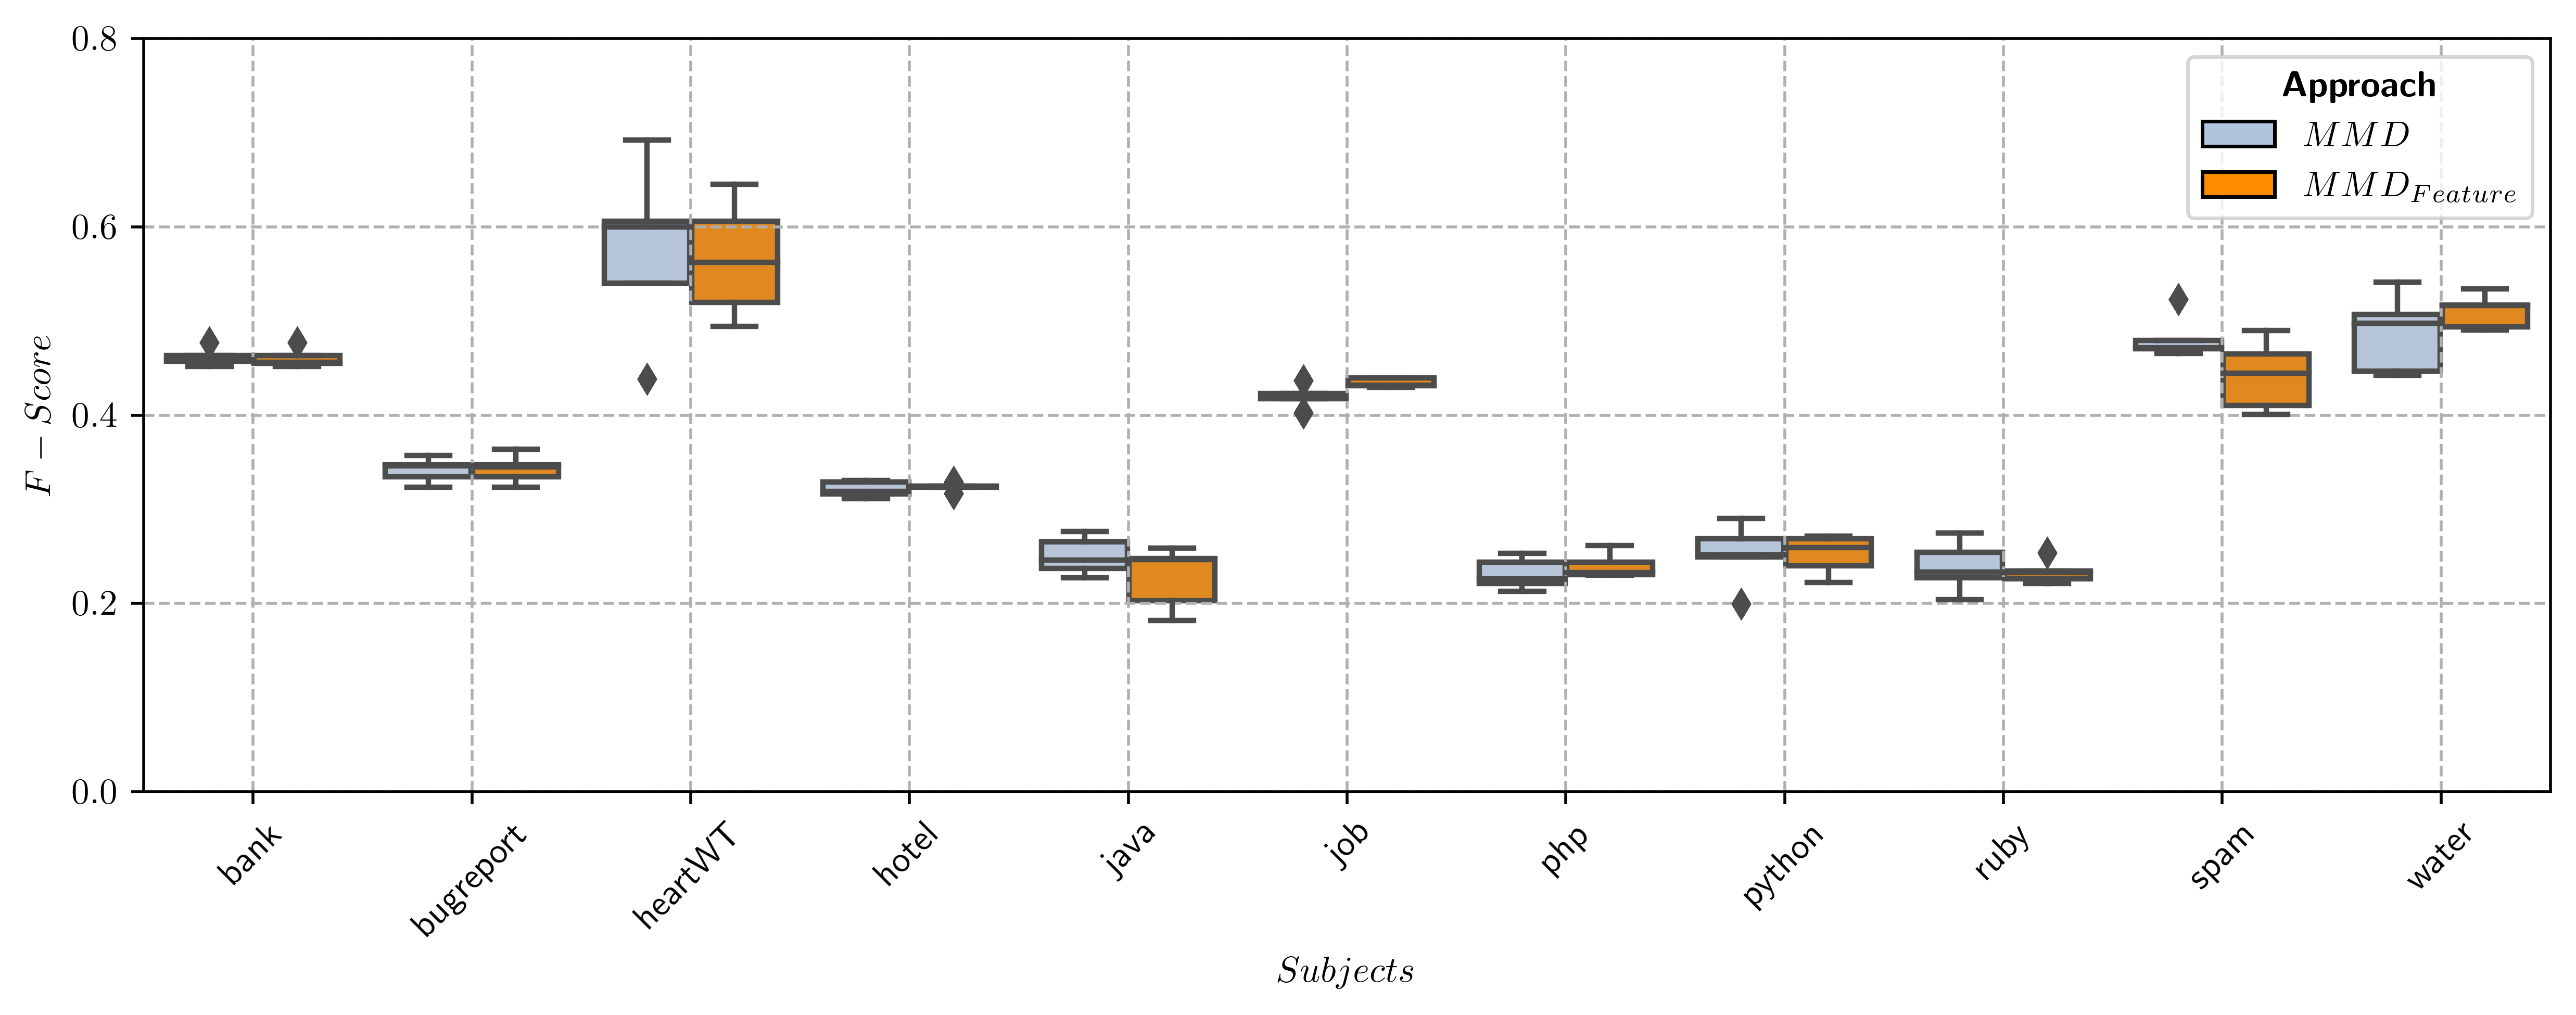

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Create the box plot
plt.figure(figsize=(10, 4), dpi=500)
plt.rcParams['text.usetex'] = True

# Define the colors
palette = {'mmd2': 'darkorange', 'mmd': 'lightsteelblue'}

sns.boxplot(x='blackbox', y='fscore', hue='rules', data=df_mmd_mmd2, palette=palette)
# plt.title('F-score Distribution by Subject for MMD and Our Approach')
plt.grid(axis="y", linestyle='--',)
plt.grid(axis="x", linestyle='--',which='both')
plt.xlabel(r'$Subjects$')
plt.ylabel(r'$F-Score$')
plt.yticks(np.arange(0, 0.81, 0.2))

plt.xticks(rotation=45)
first_patch = mpatches.Patch(ec="black" ,facecolor='lightsteelblue', label='Decision Tree')
second_patch = mpatches.Patch(ec="black" ,facecolor='darkorange',label=r'$MMD_{Feature}$')

plt.legend(title=r'\textbf{Approach}', labels=[r'$MMD$', r'$MMD_{Feature}$'], handles=[first_patch,second_patch])
# plt.legend(handles=[first_patch, second_patch])
plt.tight_layout()
plt.savefig('./RQ1-fscore.pdf')

### Statistical Analysis

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Get unique subjects
subjects = df_mmd_mmd2['blackbox'].unique()

# Initialize results list
results = []

# Perform Mann-Whitney U test for each subject
for subject in subjects:
    mmd = df_mmd_mmd2[(df_mmd_mmd2['rules'] == 'mmd') & (df_mmd_mmd2['blackbox'] == subject)]['fscore']
    mmd2 = df_mmd_mmd2[(df_mmd_mmd2['rules'] == 'mmd2') & (df_mmd_mmd2['blackbox'] == subject)]['fscore']
    
    if len(mmd) > 1 and len(mmd2) > 1:  # Ensure there are enough samples
        # u_stat, p_value = mannwhitneyu(mmd2, mmd, alternative='greater')
        u_stat, p_value = mannwhitneyu(mmd2, mmd, alternative='two-sided')
        result = {
            'subject': subject,
            'u_statistic': u_stat,
            'p_value': p_value,
            'significant': p_value < 0.05
        }
        results.append(result)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display results
# import ace_tools as tools; tools.display_dataframe_to_user(name="Mann-Whitney U Test Results by Subject", dataframe=results_df)

print(results_df)

      subject  u_statistic   p_value  significant
0        bank        262.5  0.330066        False
1   bugreport        300.0  0.813905        False
2     heartWT        287.5  0.631851        False
3       hotel        320.0  0.891484        False
4        java        225.0  0.089846        False
5         job        550.0  0.000004         True
6         php        437.5  0.014903         True
7      python        300.0  0.815016        False
8        ruby        255.0  0.266608        False
9        spam        100.0  0.000036         True
10      water        400.0  0.089923        False


In [9]:
# New

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Get unique subjects
subjects = df_mmd_mmd2['blackbox'].unique()

# Initialize results list
results = []

for subject in subjects:
    mmd = df_mmd_mmd2[(df_mmd_mmd2['rules'] == 'mmd') & (df_mmd_mmd2['blackbox'] == subject)]['time_with']
    mmd2 = df_mmd_mmd2[(df_mmd_mmd2['rules'] == 'mmd2') & (df_mmd_mmd2['blackbox'] == subject)]['time_with']
    mmd_precision = df_mmd_mmd2[(df_mmd_mmd2['rules'] == 'mmd') & (df_mmd_mmd2['blackbox'] == subject)]['specificity_with']
    mmd2_precision = df_mmd_mmd2[(df_mmd_mmd2['rules'] == 'mmd2') & (df_mmd_mmd2['blackbox'] == subject)]['specificity_with']
    mmd_recall = df_mmd_mmd2[(df_mmd_mmd2['rules'] == 'mmd') & (df_mmd_mmd2['blackbox'] == subject)]['recall_with']
    mmd2_recall = df_mmd_mmd2[(df_mmd_mmd2['rules'] == 'mmd2') & (df_mmd_mmd2['blackbox'] == subject)]['recall_with']
    
    if len(mmd) > 1 and len(mmd2) > 1:  # Ensure there are enough samples
        u_stat, p_value = mannwhitneyu(mmd2, mmd, alternative='less')
        
        mmd_min = mmd.min()
        mmd_max = mmd.max()
        mmd_median = mmd.median()
        
        mmd2_min = mmd2.min()
        mmd2_max = mmd2.max()
        mmd2_median = mmd2.median()
        
        improvement_factor = round((mmd_median / mmd2_median), 1) if mmd2_median != 0 else float('inf')
        
        mmd_precision_median = mmd_precision.median()
        mmd2_precision_median = mmd2_precision.median()
        mmd_recall_median = mmd_recall.median()
        mmd2_recall_median = mmd2_recall.median()
        
        result = {
            'subject': subject,
            'u_statistic': u_stat,
            'p_value': p_value,
            'significant': p_value < 0.05,
            'mmd_min': mmd_min,
            'mmd_median': mmd_median,
            'mmd_max': mmd_max,
            'mmd2_min': mmd2_min,
            'mmd2_median': mmd2_median,
            'mmd2_max': mmd2_max,
            'improvement_factor': improvement_factor,
            'mmd_specificity_median': mmd_precision_median,
            'mmd2_specificity_median': mmd2_precision_median,
            'mmd_recall_median': mmd_recall_median,
            'mmd2_recall_median': mmd2_recall_median
        }
        results.append(result)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
results_df

,subject,u_statistic,p_value,significant,mmd_min,mmd_median,mmd_max,mmd2_min,mmd2_median,mmd2_max,improvement_factor,mmd_specificity_median,mmd2_specificity_median,mmd_recall_median,mmd2_recall_median
0,bank,0.0,7.078281e-10,True,695.454,791.027,1017.551,162.383,203.448,268.722,3.9,0.870,0.869,0.685,0.705
1,bugreport,0.0,7.078281e-10,True,223.582,352.162,576.908,17.937,37.575,53.945,9.4,0.618,0.614,0.736,0.760
2,heartWT,0.0,7.078281e-10,True,29.080,54.761,119.522,10.103,13.488,23.866,4.1,0.657,0.667,0.800,0.750
3,hotel,0.0,7.078281e-10,True,126.757,237.681,691.516,26.866,47.569,58.901,5.0,0.193,0.273,0.877,0.812
4,java,0.0,7.078281e-10,True,1778.969,2098.173,2589.793,325.901,424.383,811.743,4.9,0.912,0.895,0.373,0.402
5,job,5.0,1.287108e-09,True,121.029,144.736,177.839,80.101,93.463,133.297,1.5,0.616,0.809,0.625,0.456
6,php,0.0,7.078281e-10,True,753.267,1877.204,2452.397,154.542,235.208,659.542,8.0,0.713,0.829,0.627,0.509
7,python,0.0,7.078281e-10,True,1712.668,1944.548,3617.207,210.930,316.390,365.183,6.1,0.850,0.905,0.476,0.382
8,ruby,0.0,7.078281e-10,True,1942.289,2277.169,4196.548,224.519,431.725,642.835,5.3,0.788,0.797,0.614,0.574
9,spam,0.0,7.078281e-10,True,523.052,635.424,897.119,47.114,64.926,100.264,9.8,0.411,0.578,0.624,0.492


### Time

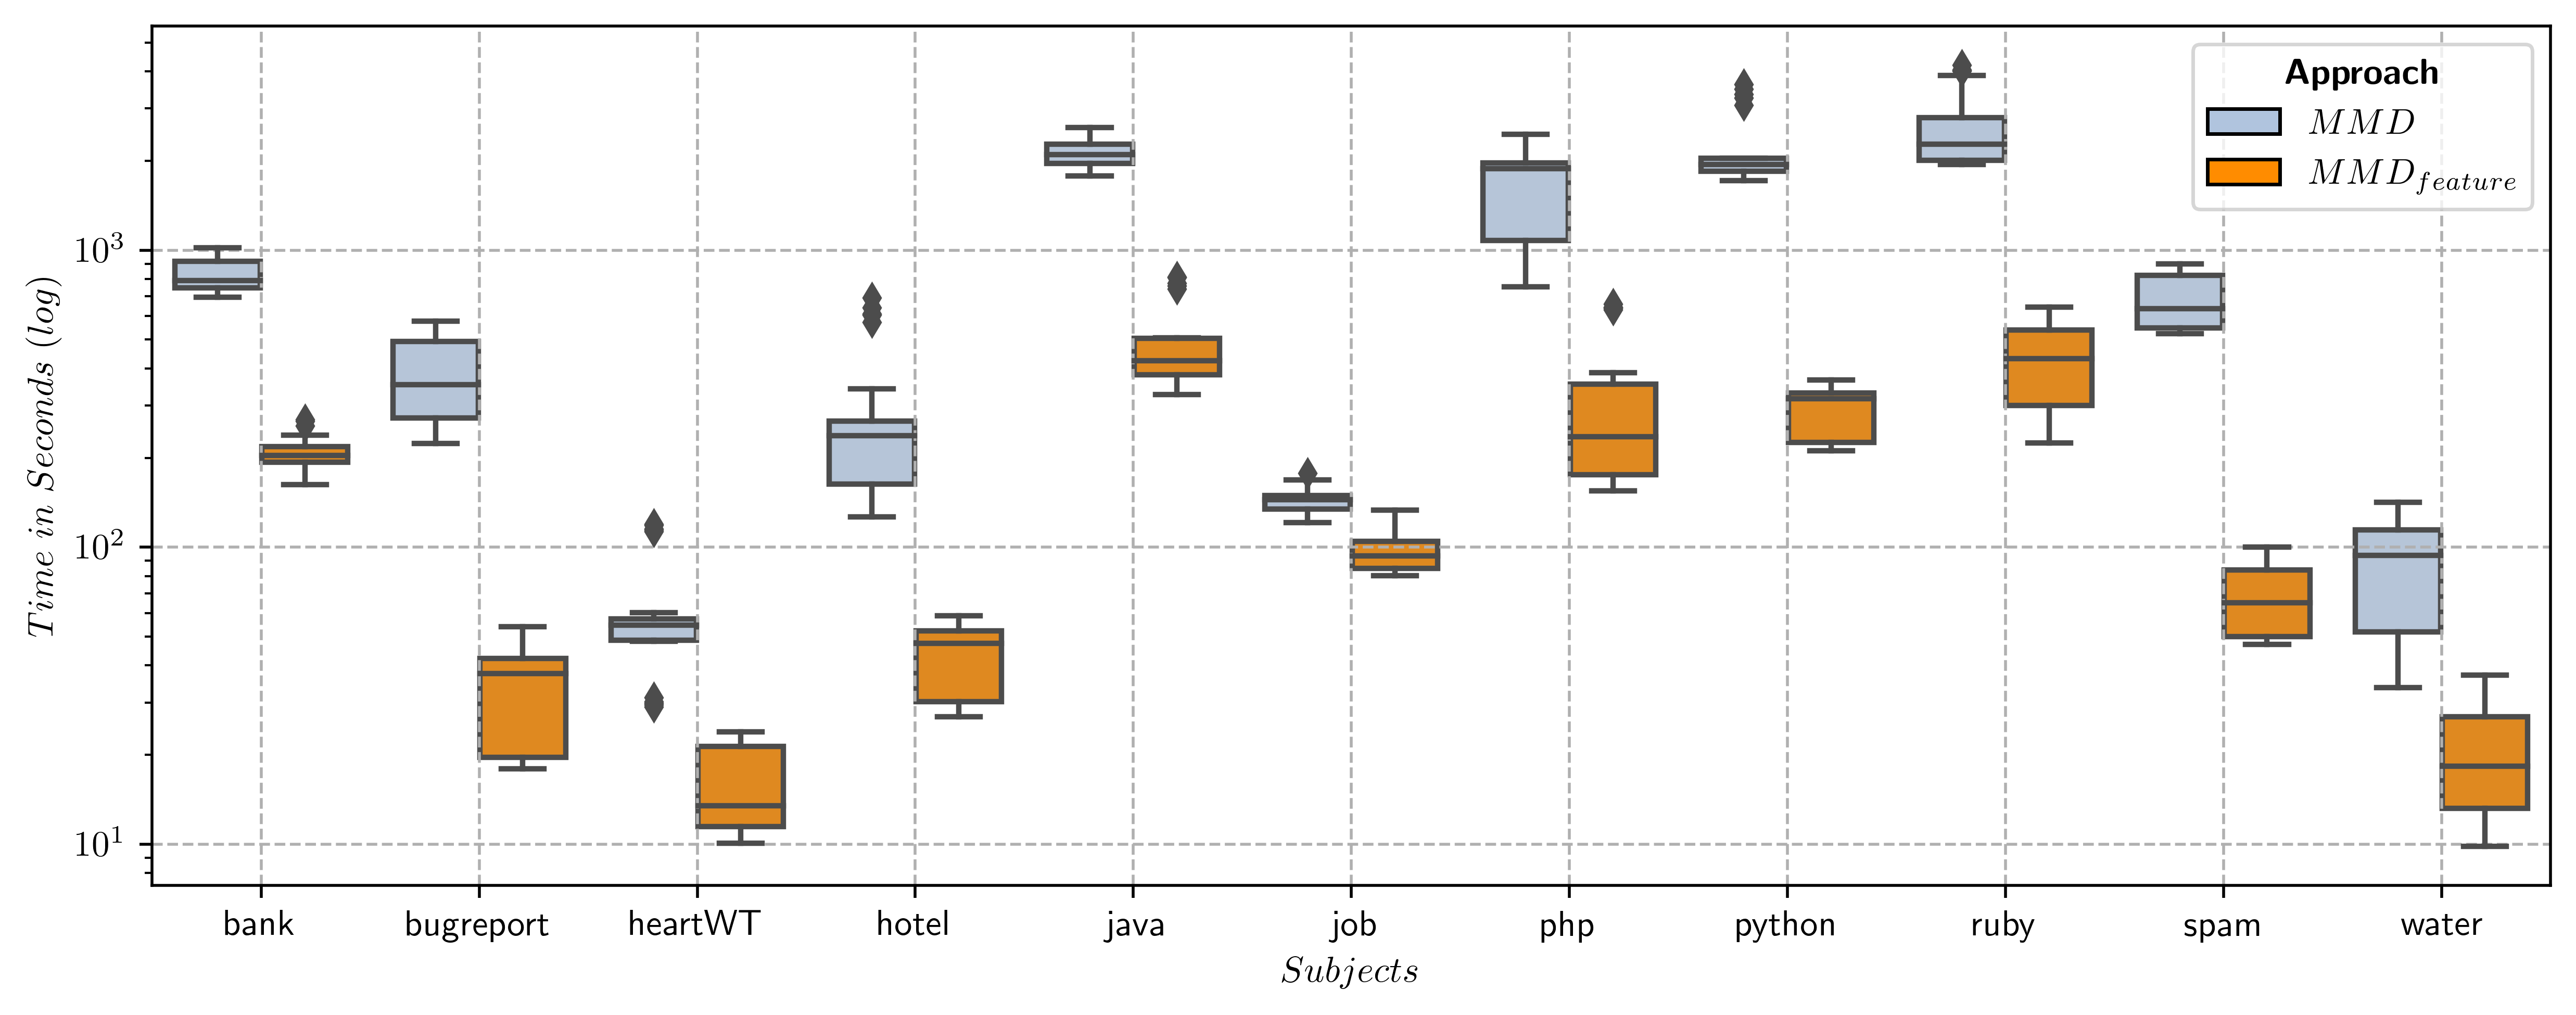

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Create the box plot
plt.figure(figsize=(10, 4), dpi=500)
plt.rcParams['text.usetex'] = True

# Define the colors
palette = {'mmd2': 'darkorange', 'mmd': 'lightsteelblue'}

sns.boxplot(x='blackbox', y='time_with', hue='rules', data=df_mmd_mmd2, palette=palette)
# plt.title('F-score Distribution by Subject for MMD and Our Approach')
plt.grid(axis="y", linestyle='--',)
plt.grid(axis="x", linestyle='--',which='both')
plt.xlabel(r'$Subjects$')
plt.ylabel(r'$Time$ $in$ $Seconds$ $(log)$')
plt.yscale('log')

#plt.xticks(rotation=45)
first_patch = mpatches.Patch(ec="black" ,facecolor='lightsteelblue', label='Decision Tree')
second_patch = mpatches.Patch(ec="black" ,facecolor='darkorange',label=r'$MMD_{feature}$')

plt.legend(title=r'\textbf{Approach}', labels=[r'$MMD$', r'$MMD_{feature}$'], handles=[first_patch,second_patch])
# plt.legend(handles=[first_patch, second_patch])
plt.tight_layout()
plt.savefig('./RQ1-time.pdf')

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Get unique subjects
subjects = df_mmd_mmd2['blackbox'].unique()

# Initialize results list
results = []

for subject in subjects:
    mmd = df_mmd_mmd2[(df_mmd_mmd2['rules'] == 'mmd') & (df_mmd_mmd2['blackbox'] == subject)]['time_with']
    mmd2 = df_mmd_mmd2[(df_mmd_mmd2['rules'] == 'mmd2') & (df_mmd_mmd2['blackbox'] == subject)]['time_with']
    
    if len(mmd) > 1 and len(mmd2) > 1:  # Ensure there are enough samples
        u_stat, p_value = mannwhitneyu(mmd2, mmd, alternative='less')
        
        mmd_min = mmd.min()
        mmd_max = mmd.max()
        mmd_median = mmd.median()
        
        mmd2_min = mmd2.min()
        mmd2_max = mmd2.max()
        mmd2_median = mmd2.median()
        
        improvement_factor = round((mmd_median / mmd2_median), 1) if mmd2_median != 0 else float('inf')
        
        result = {
            'subject': subject,
            'u_statistic': u_stat,
            'p_value': p_value,
            'significant': p_value < 0.05,
            'mmd_min': mmd_min,
            'mmd_median': mmd_median,
            'mmd_max': mmd_max,
            'mmd2_min': mmd2_min,
            'mmd2_median': mmd2_median,
            'mmd2_max': mmd2_max,
            'improvement_factor': improvement_factor
        }
        results.append(result)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
results_df
# Display results
#latex = results_df.drop(["u_statistic", "significant"], axis=1)
#print(latex.to_latex(index=False))

,subject,u_statistic,p_value,significant,mmd_min,mmd_median,mmd_max,mmd2_min,mmd2_median,mmd2_max,improvement_factor
0,bank,0.0,7.078281e-10,True,695.454,791.027,1017.551,162.383,203.448,268.722,3.9
1,bugreport,0.0,7.078281e-10,True,223.582,352.162,576.908,17.937,37.575,53.945,9.4
2,heartWT,0.0,7.078281e-10,True,29.080,54.761,119.522,10.103,13.488,23.866,4.1
3,hotel,0.0,7.078281e-10,True,126.757,237.681,691.516,26.866,47.569,58.901,5.0
4,java,0.0,7.078281e-10,True,1778.969,2098.173,2589.793,325.901,424.383,811.743,4.9
5,job,5.0,1.287108e-09,True,121.029,144.736,177.839,80.101,93.463,133.297,1.5
6,php,0.0,7.078281e-10,True,753.267,1877.204,2452.397,154.542,235.208,659.542,8.0
7,python,0.0,7.078281e-10,True,1712.668,1944.548,3617.207,210.930,316.390,365.183,6.1
8,ruby,0.0,7.078281e-10,True,1942.289,2277.169,4196.548,224.519,431.725,642.835,5.3
9,spam,0.0,7.078281e-10,True,523.052,635.424,897.119,47.114,64.926,100.264,9.8


In [13]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming df_tree is your DataFrame
# Create the DataFrame for example
# df_tree = pd.read_csv('path_to_your_file.csv')

# Get unique subjects
subjects = df_mmd_mmd2['blackbox'].unique()

# Initialize results list
results = []

# Perform Mann-Whitney U test for each subject
for subject in subjects:
    mmd = df_mmd_mmd2[(df_mmd_mmd2['rules'] == 'mmd') & (df_mmd_mmd2['blackbox'] == subject)]['time_with']
    tree = df_mmd_mmd2[(df_mmd_mmd2['rules'] == 'mmd2') & (df_mmd_mmd2['blackbox'] == subject)]['time_with']
    time_inf = df_mmd_mmd2[(df_mmd_mmd2['rules'] == 'mmd2') & (df_mmd_mmd2['blackbox'] == subject)]['time_influential']

    mmd_median = mmd.median()
    tree_median = tree.median()
    time_median = time_inf.median()

    if len(mmd) > 1 and len(tree) > 1:  # Ensure there are enough samples
        u_stat, p_value = mannwhitneyu(tree, mmd)
        result = {
            'subject': subject,
            'mmd_fscore': mmd_median,
            'tree_fscore': tree_median,
            'time_median': time_median,
            'p_value': p_value,
            'significant': p_value < 0.05
        }
        results.append(result)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Generate LaTeX table
latex_table = "\\begin{table}[h!]\n\\centering\n\\begin{tabular}{|c|c|c|c|c|}\n\\hline\n"
latex_table += "Subject & MMD F-Score & Tree F-Score & Time & p-value \\\\\n\\hline\n"

for index, row in results_df.iterrows():
    subject = row['subject']
    mmd_fscore = row['mmd_fscore']
    tree_fscore = row['tree_fscore']
    time_infi = row['time_median']
    p_value = row['p_value']
    
    if row['significant']:
        tree_fscore = f"\\textbf{{{tree_fscore:.2f}}}"
    else:
        tree_fscore = f"{tree_fscore:.2f}"

    p_value = "< 0.0001" if p_value <= 0.0001 else f"{p_value:.4f}"
    
    latex_table += f"{subject} & {round(mmd_fscore)} & {tree_fscore} & {time_infi:.2f} & {p_value} \\\\\n"

latex_table += "\\hline\n\\end{tabular}\n\\caption{Comparison of F-Scores for MMD and Tree Approaches}\n\\end{table}"

# Print LaTeX table
print(latex_table)

\begin{table}[h!]
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
Subject & MMD F-Score & Tree F-Score & Time & p-value \\
\hline
bank & 791 & \textbf{203.45} & 1.33 & < 0.0001 \\
bugreport & 352 & \textbf{37.58} & 0.89 & < 0.0001 \\
heartWT & 55 & \textbf{13.49} & 0.33 & < 0.0001 \\
hotel & 238 & \textbf{47.57} & 1.45 & < 0.0001 \\
java & 2098 & \textbf{424.38} & 1.46 & < 0.0001 \\
job & 145 & \textbf{93.46} & 1.24 & < 0.0001 \\
php & 1877 & \textbf{235.21} & 1.64 & < 0.0001 \\
python & 1945 & \textbf{316.39} & 1.56 & < 0.0001 \\
ruby & 2277 & \textbf{431.73} & 1.23 & < 0.0001 \\
spam & 635 & \textbf{64.93} & 12.37 & < 0.0001 \\
water & 94 & \textbf{18.31} & 0.44 & < 0.0001 \\
\hline
\end{tabular}
\caption{Comparison of F-Scores for MMD and Tree Approaches}
\end{table}


# MMD vs. MMD Feature vs. Tree

In [49]:
# Create a new DataFrame as a copy of the original
df_tree = pd.read_csv('../evaluation/results.csv')

# Relabel the rules column in the new DataFrame
df_tree.loc[(df_tree['learner'] == 3) & (df_tree['rules'] == 'induction') & (df_tree['coverage'] == 0.6), 'rules'] = 'mmd2'
df_tree.loc[(df_tree['learner'] == 0) & (df_tree['rules'] == 'induction') & (df_tree['coverage'] == 0.6), 'rules'] = 'mmd'

df_tree.loc[(df_tree['learner'] == 3) & (df_tree['rules'] == 'tree') & (df_tree['coverage'] == 0.6), 'rules'] = 'tree_comp'
#df_tree.loc[(df_tree['learner'] == 0) & (df_tree['rules'] == 'tree') & (df_tree['coverage'] == 0.6), 'rules'] = 'tree_comp_0'
#df_tree.loc[(df_tree['learner'] == 6) & (df_tree['rules'] == 'tree') & (df_tree['coverage'] == 0.6), 'rules'] = 'tree_comp_4'


# Filter rows where rules is either 'induction' or 'mmd2'
#df_tree = df_tree[df_tree['rules'].isin(['mmd', 'mmd2', 'tree_comp', "tree_comp_0", "tree_comp_4"])]
df_tree = df_tree[df_tree['rules'].isin(['mmd', 'mmd2', 'tree_comp'])]

# df_tree.reset_index()
# df_tree.head(20)

In [50]:
# Calculate F-score
df_tree['fscore'] = 2 * (df_tree['precision_with'] * df_tree['recall_with']) / (df_tree['precision_with'] + df_tree['recall_with'])
# df_tree.head()

In [51]:
# df_tree = df_tree[df_tree['rules'].isin(['mmd', 'tree_comp'])]

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Create the box plot
plt.figure(figsize=(10, 4), dpi=500)
plt.rcParams['text.usetex'] = True

# Define the colors
palette = {'tree_comp': 'darkorange', 'mmd': 'lightsteelblue'}

sns.boxplot(x='blackbox', y='fscore', hue='rules', data=df_tree, palette=palette)
# plt.title('F-score Distribution by Subject for MMD and Our Approach')
plt.grid(axis="y", linestyle='--',)
plt.grid(axis="x", linestyle='--',which='both')
plt.xlabel(r'$Subjects$')
plt.ylabel(r'$F-Score$')
#plt.xticks(rotation=45)
plt.yticks(np.arange(0, 0.81, 0.2))

first_patch = mpatches.Patch(ec="black" ,facecolor='lightsteelblue')
second_patch = mpatches.Patch(ec="black" ,facecolor='darkorange')

plt.legend(title=r'\textbf{Approach}', labels=[r'$MMD$', r'$Tree_{feature}$'], handles=[first_patch,second_patch])
# plt.legend(handles=[first_patch, second_patch])
plt.tight_layout()
plt.savefig('./RQ2-fscore.pdf')

KeyError: 'mmd2'

<Figure size 5000x2000 with 0 Axes>

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Get unique subjects
subjects = df_tree['blackbox'].unique()

# Initialize results list
results = []

# Perform Mann-Whitney U test for each subject
for subject in subjects:
    mmd = df_tree[(df_tree['rules'] == 'mmd') & (df_tree['blackbox'] == subject)]['fscore']
    tree = df_tree[(df_tree['rules'] == 'mmd2') & (df_tree['blackbox'] == subject)]['fscore']
    
    if len(mmd) > 1 and len(tree) > 1:  # Ensure there are enough samples
        u_stat, p_value = mannwhitneyu(tree, mmd, alternative='greater')
        result = {
            'subject': subject,
            'u_statistic': u_stat,
            'p_value': p_value,
            'significant': p_value < 0.05
        }
        results.append(result)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display results
# import ace_tools as tools; tools.display_dataframe_to_user(name="Mann-Whitney U Test Results by Subject", dataframe=results_df)

print(results_df)

      subject  u_statistic   p_value  significant
0        bank        262.5  0.839805        False
1   bugreport        300.0  0.600641        False
2     heartWT        287.5  0.690997        False
3       hotel        320.0  0.445742        False
4        java        225.0  0.956892        False
5         job        550.0  0.000002         True
6         php        437.5  0.007451         True
7      python        300.0  0.600042        False
8        ruby        255.0  0.870846        False
9        spam        100.0  0.999984        False
10      water        400.0  0.044962         True


In [56]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming df_tree is your DataFrame
# Create the DataFrame for example
# df_tree = pd.read_csv('path_to_your_file.csv')

# Get unique subjects
subjects = df_tree['blackbox'].unique()

# Initialize results list
results = []

# Perform Mann-Whitney U test for each subject
for subject in subjects:
    mmd = df_tree[(df_tree['rules'] == 'mmd') & (df_tree['blackbox'] == subject)]['fscore']
    tree = df_tree[(df_tree['rules'] == 'mmd2') & (df_tree['blackbox'] == subject)]['fscore']

    m = df_tree[(df_tree['rules'] == 'mmd') & (df_tree['blackbox'] == subject)]
    mmd_precision = m["precision_with"].median()
    mmd_recall = m["recall_with"].median()
    
    t = df_tree[(df_tree['rules'] == 'mmd2') & (df_tree['blackbox'] == subject)]
    tree_precision = t["precision_with"].median()
    tree_recall = t["recall_with"].median()

    mmd_median = mmd.median()
    tree_median = tree.median()

    if len(mmd) > 1 and len(tree) > 1:  # Ensure there are enough samples
        u_stat, p_value = mannwhitneyu(tree, mmd)
        result = {
            'subject': subject,
            'mmd_fscore': mmd_median,
            "mmd_prec": mmd_precision,
            "mmd_recall": mmd_recall,
            'tree_fscore': tree_median,
            "tree_prec": tree_precision,
            "tree_recall": tree_recall,
            'p_value': p_value,
            'significant': p_value < 0.05
        }
        results.append(result)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Generate LaTeX table
latex_table = "\\begin{table}[h!]\n\\centering\n\\begin{tabular}{|c|c|c|c|}\n\\hline\n"
latex_table += "Subject & MMD Precision & MMD Recall & MMD F-Score & MMDFast Precision & MMDFast Recall & MMDFast F-Score & p-value \\\\\n\\hline\n"

for index, row in results_df.iterrows():
    subject = row['subject']
    mmd_fscore = row['mmd_fscore']
    mmd_prec = row["mmd_prec"]
    mmd_recall = row["mmd_recall"]
    tree_fscore = row['tree_fscore']
    tree_prec = row['tree_prec']
    tree_recall = row['tree_recall']
    p_value = row['p_value']
    
    if row['significant']:
        tree_fscore = f"\\textbf{{{tree_fscore:.3f}}}"
    else:
        tree_fscore = f"{tree_fscore:.3f}"

    p_value = "< 0.0001" if p_value <= 0.0001 else f"{p_value:.4f}"
    
    latex_table += f"{subject} & {mmd_prec:.3f} & {mmd_recall:.3f} & {mmd_fscore:.3f} & {tree_prec:.3f} & {tree_recall:.3f} & {tree_fscore} & {p_value} \\\\\n"

latex_table += "\\hline\n\\end{tabular}\n\\caption{Comparison of F-Scores for MMD and Tree Approaches}\n\\end{table}"

# Print LaTeX table
print(latex_table)

\begin{table}[h!]
\centering
\begin{tabular}{|c|c|c|c|}
\hline
Subject & MMD Precision & MMD Recall & MMD F-Score & MMDFast Precision & MMDFast Recall & MMDFast F-Score & p-value \\
\hline
bank & 0.355 & 0.685 & 0.459 & 0.344 & 0.705 & 0.456 & 0.3301 \\
bugreport & 0.227 & 0.736 & 0.346 & 0.227 & 0.760 & 0.345 & 0.8139 \\
heartWT & 0.465 & 0.800 & 0.600 & 0.450 & 0.750 & 0.563 & 0.6319 \\
hotel & 0.195 & 0.877 & 0.319 & 0.202 & 0.812 & 0.324 & 0.8915 \\
java & 0.195 & 0.373 & 0.246 & 0.179 & 0.402 & 0.247 & 0.0898 \\
job & 0.317 & 0.625 & 0.418 & 0.413 & 0.456 & \textbf{0.432} & < 0.0001 \\
php & 0.136 & 0.627 & 0.226 & 0.155 & 0.509 & \textbf{0.233} & 0.0149 \\
python & 0.169 & 0.476 & 0.251 & 0.196 & 0.382 & 0.259 & 0.8150 \\
ruby & 0.144 & 0.614 & 0.233 & 0.146 & 0.574 & 0.233 & 0.2666 \\
spam & 0.379 & 0.624 & 0.472 & 0.383 & 0.492 & \textbf{0.444} & < 0.0001 \\
water & 0.388 & 0.849 & 0.498 & 0.362 & 0.892 & 0.516 & 0.0899 \\
\hline
\end{tabular}
\caption{Comparison of F-Scores fo

In [57]:
import pandas as pd
from scipy.stats import mannwhitneyu

def stats_for_subject(df):
    # split out the two rule‐sets
    a = df[df.rules=='mmd']
    b = df[df.rules=='mmd2']

    # medians
    prec_a, rec_a, f_a = a.precision_with.median(), a.recall_with.median(), a.fscore.median()
    prec_b, rec_b, f_b = b.precision_with.median(), b.recall_with.median(), b.fscore.median()

    # Mann‐Whitney U (only if both have >1 sample)
    if len(a.fscore)>1 and len(b.fscore)>1:
        _, p = mannwhitneyu(b.fscore, a.fscore)
    else:
        p = None

    return pd.Series({
        'mmd_prec': prec_a,
        'mmd_rec':  rec_a,
        'mmd_f':    f_a,
        'tree_prec': prec_b,
        'tree_rec':  rec_b,
        'tree_f':    f_b,
        'p':         p
    })

# 1) compute per‐subject stats
results = df_tree.groupby('blackbox').apply(stats_for_subject).reset_index()

# 2) format fields
def fmt_p(x):
    if x is None: return '–'
    return '< 0.0001' if x <= 1e-4 else f'{x:.4f}'

def bold_if_sig(row):
    return f"\\textbf{{{row.tree_f:.3f}}}" if row.p is not None and row.p < 0.05 else f"{row.tree_f:.3f}"

results['p_str']      = results['p'].map(fmt_p)
results['tree_f_str'] = results.apply(bold_if_sig, axis=1)

# 3) build LaTeX
header = (
    "\\begin{table}[h!]\n"
    "\\centering\n"
    "\\begin{tabular}{|c|c|c|c|c|c|c|c|}\n"
    "\\hline\n"
    "Subject & MMD Precision & MMD Recall & MMD F-Score & "
    "MMDFast Precision & MMDFast Recall & MMDFast F-Score & p-value \\\\\n"
    "\\hline\n"
)

rows = []
for _, r in results.iterrows():
    rows.append(
        f"{r.blackbox} & "
        f"{r.mmd_prec:.3f} & {r.mmd_rec:.3f} & {r.mmd_f:.3f} & "
        f"{r.tree_prec:.3f} & {r.tree_rec:.3f} & {r.tree_f_str} & {r.p_str} \\\\"
    )

footer = "\\hline\n\\end{tabular}\n\\caption{Comparison of F-Scores for MMD and Tree Approaches}\n\\end{table}"

latex_table = "\n".join([header, *rows, footer])
print(latex_table)


\begin{table}[h!]
\centering
\begin{tabular}{|c|c|c|c|c|c|c|c|}
\hline
Subject & MMD Precision & MMD Recall & MMD F-Score & MMDFast Precision & MMDFast Recall & MMDFast F-Score & p-value \\
\hline

bank & 0.355 & 0.685 & 0.459 & 0.344 & 0.705 & 0.456 & 0.3301 \\
bugreport & 0.227 & 0.736 & 0.346 & 0.227 & 0.760 & 0.345 & 0.8139 \\
heartWT & 0.465 & 0.800 & 0.600 & 0.450 & 0.750 & 0.563 & 0.6319 \\
hotel & 0.195 & 0.877 & 0.319 & 0.202 & 0.812 & 0.324 & 0.8915 \\
java & 0.195 & 0.373 & 0.246 & 0.179 & 0.402 & 0.247 & 0.0898 \\
job & 0.317 & 0.625 & 0.418 & 0.413 & 0.456 & \textbf{0.432} & < 0.0001 \\
php & 0.136 & 0.627 & 0.226 & 0.155 & 0.509 & \textbf{0.233} & 0.0149 \\
python & 0.169 & 0.476 & 0.251 & 0.196 & 0.382 & 0.259 & 0.8150 \\
ruby & 0.144 & 0.614 & 0.233 & 0.146 & 0.574 & 0.233 & 0.2666 \\
spam & 0.379 & 0.624 & 0.472 & 0.383 & 0.492 & \textbf{0.444} & < 0.0001 \\
water & 0.388 & 0.849 & 0.498 & 0.362 & 0.892 & 0.516 & 0.0899 \\
\hline
\end{tabular}
\caption{Comparison of F-

## MMD vs. Tree Time

In [20]:
# Filter the DataFrame to include only 'tree' and 'induction' approaches
df_tree = df_tree[df_tree['rules'].isin(['mmd', 'tree_comp'])]

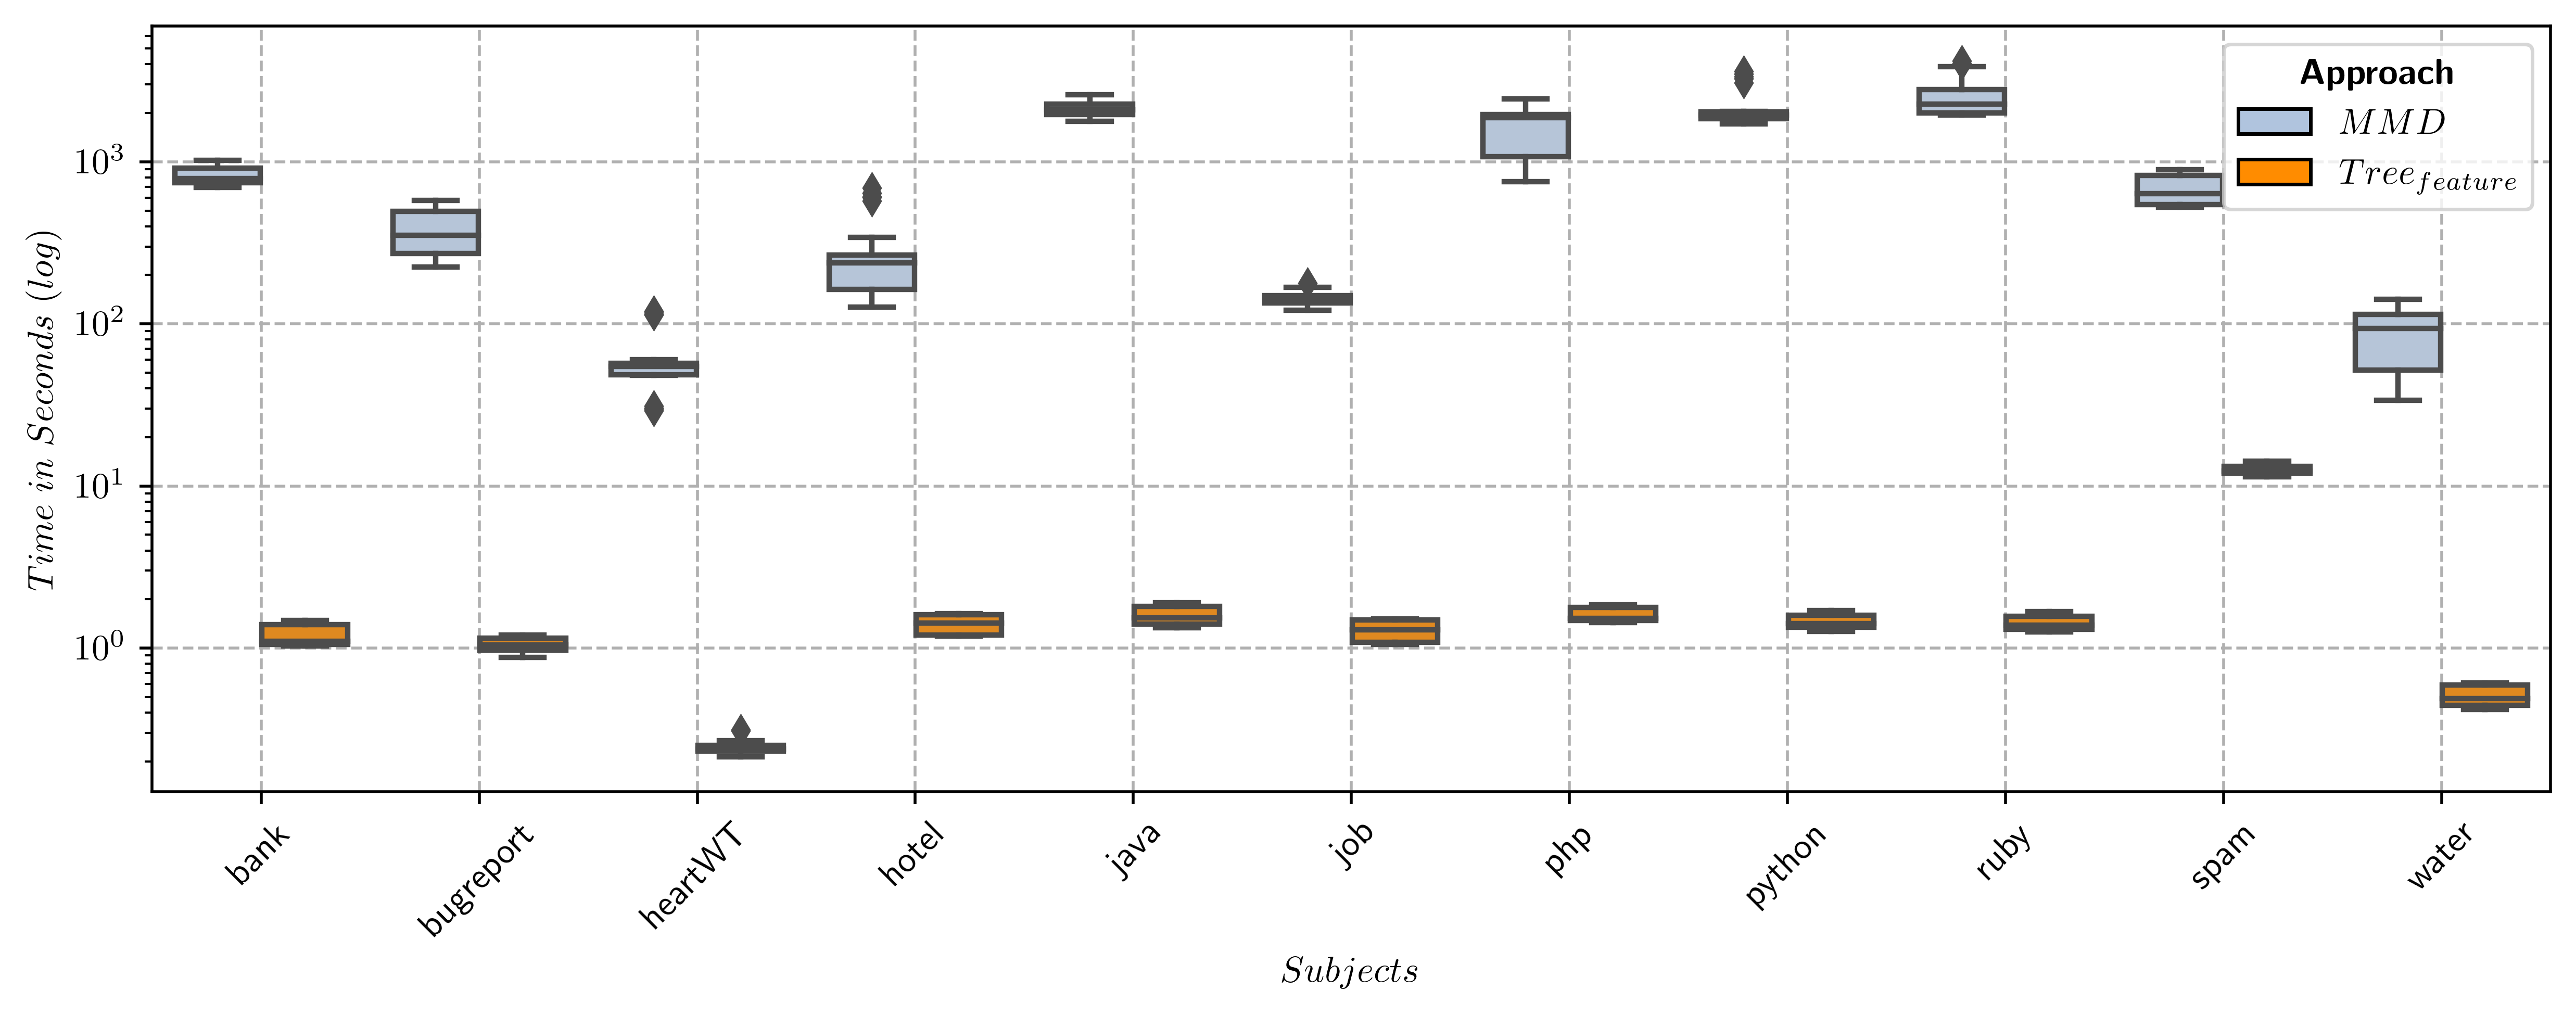

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Create the box plot
plt.figure(figsize=(10, 4), dpi=500)
plt.rc('axes', axisbelow=True)
plt.rcParams['text.usetex'] = True


# Define the colors
palette = {'tree_comp': 'darkorange', 'mmd': 'lightsteelblue'}

sns.boxplot(x='blackbox', y='time_with', hue='rules', data=df_tree, palette=palette)
# plt.title('F-score Distribution by Subject for MMD and Our Approach')
plt.grid(axis="y", linestyle='--',)
plt.grid(axis="x", linestyle='--',which='both')
plt.xlabel(r'$Subjects$')
plt.ylabel(r'$Time$ $in$ $Seconds$ $(log)$')
plt.yscale('log')
plt.xticks(rotation=45)

first_patch = mpatches.Patch(ec="black" ,facecolor='lightsteelblue')
second_patch = mpatches.Patch(ec="black" ,facecolor='darkorange')

plt.legend(title=r'\textbf{Approach}', labels=[r'$MMD$', r'$Tree_{feature}$'], handles=[first_patch,second_patch])
# plt.legend(handles=[first_patch, second_patch])
plt.tight_layout()
plt.savefig('./RQ2-time.pdf')

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Get unique subjects
subjects = df_tree['blackbox'].unique()

# Initialize results list
results = []

# Perform Mann-Whitney U test for each subject
for subject in subjects:
    mmd = df_tree[(df_tree['rules'] == 'mmd') & (df_tree['blackbox'] == subject)]['time_with']
    tree = df_tree[(df_tree['rules'] == 'tree_comp') & (df_tree['blackbox'] == subject)]['time_with']
    
    if len(mmd) > 1 and len(tree) > 1:  # Ensure there are enough samples
        u_stat, p_value = mannwhitneyu(tree, mmd, alternative='less')
        
        mmd_min = mmd.min()
        mmd_max = mmd.max()
        mmd_median = mmd.median()
        
        tree_min = tree.min()
        tree_max = tree.max()
        tree_median = tree.median()
        
        improvement_factor = round((mmd_median / tree_median) * 100, 1) if mmd_median != 0 else float('inf')
        
        result = {
            'subject': subject,
            'u_statistic': u_stat,
            'p_value': p_value,
            'significant': p_value < 0.05,
            'mmd_min': mmd_min,
            'mmd_max': mmd_max,
            'mmd_median': mmd_median,
            'tree_min': tree_min,
            'tree_max': tree_max,
            'tree_median': tree_median,
            'improvement_factor': improvement_factor
        }
        results.append(result)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

results_df

,subject,u_statistic,p_value,significant,mmd_min,mmd_max,mmd_median,tree_min,tree_max,tree_median,improvement_factor
0,bank,0.0,7.065512e-10,True,695.454,1017.551,791.027,1.033,1.479,1.100,71911.5
1,bugreport,0.0,7.078281e-10,True,223.582,576.908,352.162,0.877,1.199,1.044,33732.0
2,heartWT,0.0,7.033679e-10,True,29.080,119.522,54.761,0.213,0.314,0.238,23008.8
3,hotel,0.0,7.071894e-10,True,126.757,691.516,237.681,1.188,1.629,1.425,16679.4
4,java,0.0,7.078281e-10,True,1778.969,2589.793,2098.173,1.331,1.905,1.537,136510.9
5,job,0.0,7.065512e-10,True,121.029,177.839,144.736,1.053,1.512,1.291,11211.2
6,php,0.0,7.071894e-10,True,753.267,2452.397,1877.204,1.433,1.846,1.526,123014.7
7,python,0.0,7.078281e-10,True,1712.668,3617.207,1944.548,1.269,1.700,1.415,137423.9
8,ruby,0.0,7.065512e-10,True,1942.289,4196.548,2277.169,1.260,1.673,1.389,163943.1
9,spam,0.0,7.078281e-10,True,523.052,897.119,635.424,11.368,14.215,12.367,5138.1


In [23]:
# Display results
latex = results_df.drop(["u_statistic", "significant"], axis=1)
print(latex.to_latex(index=False))

\begin{tabular}{lrrrrrrrr}
\toprule
  subject &      p\_value &  mmd\_min &  mmd\_max &  mmd\_median &  tree\_min &  tree\_max &  tree\_median &  improvement\_factor \\
\midrule
     bank & 7.065512e-10 &  695.454 & 1017.551 &     791.027 &     1.033 &     1.479 &        1.100 &             71911.5 \\
bugreport & 7.078281e-10 &  223.582 &  576.908 &     352.162 &     0.877 &     1.199 &        1.044 &             33732.0 \\
  heartWT & 7.033679e-10 &   29.080 &  119.522 &      54.761 &     0.213 &     0.314 &        0.238 &             23008.8 \\
    hotel & 7.071894e-10 &  126.757 &  691.516 &     237.681 &     1.188 &     1.629 &        1.425 &             16679.4 \\
     java & 7.078281e-10 & 1778.969 & 2589.793 &    2098.173 &     1.331 &     1.905 &        1.537 &            136510.9 \\
      job & 7.065512e-10 &  121.029 &  177.839 &     144.736 &     1.053 &     1.512 &        1.291 &             11211.2 \\
      php & 7.071894e-10 &  753.267 & 2452.397 &    1877.204 &     1.433

/var/folders/02/7jyqzsc129vc1fqtp6sqknnm0000gn/T/ipykernel_9457/820602230.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(latex.to_latex(index=False))


In [24]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming df_tree is your DataFrame
# Create the DataFrame for example
# df_tree = pd.read_csv('path_to_your_file.csv')

# Get unique subjects
subjects = df_tree['blackbox'].unique()

# Initialize results list
results = []

# Perform Mann-Whitney U test for each subject
for subject in subjects:
    mmd = df_tree[(df_tree['rules'] == 'mmd') & (df_tree['blackbox'] == subject)]['time_with']
    tree = df_tree[(df_tree['rules'] == 'tree_comp') & (df_tree['blackbox'] == subject)]['time_with']
    time_inf = df_tree[(df_tree['rules'] == 'tree_comp') & (df_tree['blackbox'] == subject)]['time_influential']

    mmd_median = mmd.median()
    tree_median = tree.median()
    time_median = time_inf.median()

    if len(mmd) > 1 and len(tree) > 1:  # Ensure there are enough samples
        u_stat, p_value = mannwhitneyu(tree, mmd)
        result = {
            'subject': subject,
            'mmd_fscore': mmd_median,
            'tree_fscore': tree_median,
            'time_median': time_median,
            'p_value': p_value,
            'significant': p_value < 0.05
        }
        results.append(result)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Generate LaTeX table
latex_table = "\\begin{table}[h!]\n\\centering\n\\begin{tabular}{|c|c|c|c|c|}\n\\hline\n"
latex_table += "Subject & MMD F-Score & Tree F-Score & Time & p-value \\\\\n\\hline\n"

for index, row in results_df.iterrows():
    subject = row['subject']
    mmd_fscore = row['mmd_fscore']
    tree_fscore = row['tree_fscore']
    time_infi = row['time_median']
    p_value = row['p_value']
    
    if row['significant']:
        tree_fscore = f"\\textbf{{{tree_fscore:.2f}}}"
    else:
        tree_fscore = f"{tree_fscore:.2f}"

    p_value = "< 0.0001" if p_value <= 0.0001 else f"{p_value:.4f}"
    
    latex_table += f"{subject} & {round(mmd_fscore)} & {tree_fscore} & {time_infi:.4f} & {p_value} \\\\\n"

latex_table += "\\hline\n\\end{tabular}\n\\caption{Comparison of F-Scores for MMD and Tree Approaches}\n\\end{table}"

# Print LaTeX table
print(latex_table)

\begin{table}[h!]
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
Subject & MMD F-Score & Tree F-Score & Time & p-value \\
\hline
bank & 791 & \textbf{1.10} & 1.0470 & < 0.0001 \\
bugreport & 352 & \textbf{1.04} & 1.0170 & < 0.0001 \\
heartWT & 55 & \textbf{0.24} & 0.2170 & < 0.0001 \\
hotel & 238 & \textbf{1.43} & 1.3930 & < 0.0001 \\
java & 2098 & \textbf{1.54} & 1.4630 & < 0.0001 \\
job & 145 & \textbf{1.29} & 1.2260 & < 0.0001 \\
php & 1877 & \textbf{1.53} & 1.4430 & < 0.0001 \\
python & 1945 & \textbf{1.42} & 1.3460 & < 0.0001 \\
ruby & 2277 & \textbf{1.39} & 1.3280 & < 0.0001 \\
spam & 635 & \textbf{12.37} & 12.2870 & < 0.0001 \\
water & 94 & \textbf{0.49} & 0.4660 & < 0.0001 \\
\hline
\end{tabular}
\caption{Comparison of F-Scores for MMD and Tree Approaches}
\end{table}


# k-analysis

In [25]:
# Create a new DataFrame as a copy of the original
df_mmd_mmd2 = pd.read_csv('../evaluation/results.csv')

# Relabel the rules column in the new DataFrame
df_mmd_mmd2.loc[(df_mmd_mmd2['learner'] == 0) & (df_mmd_mmd2['rules'] == 'induction') & (df_mmd_mmd2['coverage'] == 0.6), 'rules'] = 'mmd'
df_mmd_mmd2.loc[(df_mmd_mmd2['learner'] == 1) & (df_mmd_mmd2['rules'] == 'induction') & (df_mmd_mmd2['coverage'] == 0.6), 'rules'] = 'l1'
df_mmd_mmd2.loc[(df_mmd_mmd2['learner'] == 2) & (df_mmd_mmd2['rules'] == 'induction') & (df_mmd_mmd2['coverage'] == 0.6), 'rules'] = 'l2'
df_mmd_mmd2.loc[(df_mmd_mmd2['learner'] == 3) & (df_mmd_mmd2['rules'] == 'induction') & (df_mmd_mmd2['coverage'] == 0.6), 'rules'] = 'l3'
df_mmd_mmd2.loc[(df_mmd_mmd2['learner'] == 4) & (df_mmd_mmd2['rules'] == 'induction') & (df_mmd_mmd2['coverage'] == 0.6), 'rules'] = 'l4'
df_mmd_mmd2.loc[(df_mmd_mmd2['learner'] == 6) & (df_mmd_mmd2['rules'] == 'induction') & (df_mmd_mmd2['coverage'] == 0.6), 'rules'] = 'l5'

# Filter rows where rules is either 'induction' or 'mmd2'
df_mmd_mmd2 = df_mmd_mmd2[df_mmd_mmd2['rules'].isin(['mmd','l1', 'l2', 'l3', 'l4', 'l5'])]

In [26]:
df_mmd_mmd2['fscore'] = 2 * (df_mmd_mmd2['precision_with'] * df_mmd_mmd2['recall_with']) / (df_mmd_mmd2['precision_with'] + df_mmd_mmd2['recall_with'])


In [27]:
df_mmd_mmd2

,run,blackbox,model,learner,rules,coverage,seed,model_number,specificity_without,precision_without,...,predicates_without,specificity_with,precision_with,recall_with,time_with,and_with,or_with,predicates_with,time_influential,fscore
45,1,bank,rfc,0,mmd,0.6,12345678,1,0.940,0.387,...,1,0.895,0.368,0.610,759.649,0,2,3,-1.000,0.459059
46,1,bank,rfc,0,mmd,0.6,23456789,2,0.941,0.399,...,1,0.890,0.355,0.643,725.704,0,1,2,-1.000,0.457445
47,1,bank,rfc,0,mmd,0.6,34567890,3,0.945,0.430,...,1,0.870,0.355,0.727,962.661,0,2,3,-1.000,0.477052
48,1,bank,rfc,0,mmd,0.6,45678901,4,0.943,0.406,...,1,0.869,0.337,0.685,791.027,0,3,4,-1.000,0.451751
49,1,bank,rfc,0,mmd,0.6,56789012,5,0.944,0.412,...,1,0.869,0.345,0.705,1006.451,0,3,4,-1.000,0.463286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17435,5,water,rfc,6,l5,0.6,12345678,1,0.995,0.500,...,1,0.640,0.404,0.500,92.395,0,1,2,0.404,0.446903
17436,5,water,rfc,6,l5,0.6,23456789,2,0.230,0.343,...,1,0.220,0.351,0.911,75.461,1,2,4,0.577,0.506753
17437,5,water,rfc,6,l5,0.6,34567890,3,0.235,0.360,...,1,0.580,0.418,0.613,64.530,2,6,9,0.557,0.497059
17438,5,water,rfc,6,l5,0.6,45678901,4,0.240,0.379,...,1,0.237,0.386,0.887,40.714,2,2,5,0.571,0.537914


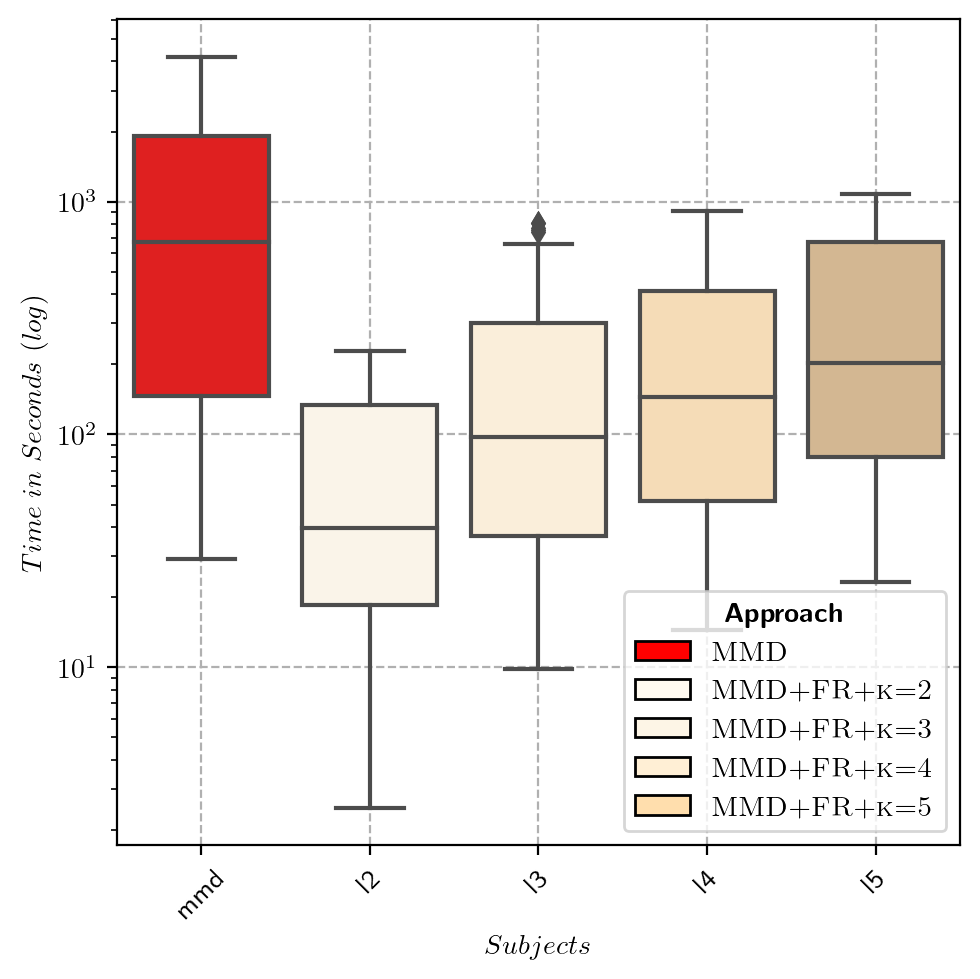

In [28]:
# Create the box plot
plt.figure(figsize=(5, 5), dpi=200)
plt.rcParams['text.usetex'] = True

# Define the colors
palette = {'mmd': 'red','l1': 'floralwhite', 'l2': 'oldlace', 'l3': 'papayawhip', 'l4': 'navajowhite', 'l5': 'burlywood'}

#sns.boxplot(x='blackbox', y='time_with', hue='rules', data=df_mmd_mmd2, palette=palette)
sns.boxplot(x='rules', y='time_with', data=df_mmd_mmd2, palette=palette)
# plt.title('F-score Distribution by Subject for MMD and Our Approach')
plt.grid(axis="y", linestyle='--',)
plt.grid(axis="x", linestyle='--',which='both')
plt.xlabel(r'$Subjects$')
plt.ylabel(r'$F-Score$')
plt.xlabel(r'$Subjects$')
plt.ylabel(r'$Time$ $in$ $Seconds$ $(log)$')
plt.yscale('log')

plt.xticks(rotation=45)
first_patch = mpatches.Patch(ec="black" ,facecolor='red')

second_patch = mpatches.Patch(ec="black" ,facecolor='floralwhite')
third_patch = mpatches.Patch(ec="black" ,facecolor='oldlace')
fourth_patch = mpatches.Patch(ec="black" ,facecolor='papayawhip')
fith_patch = mpatches.Patch(ec="black" ,facecolor='navajowhite')
sixth_patch = mpatches.Patch(ec="black" ,facecolor='burlywood')

plt.legend(title=r'\textbf{Approach}', labels=[r'\scshape{MMD}', r'\scshape{MMD+FR+k=2}', r'\scshape{MMD+FR+k=3}', r'\scshape{MMD+FR+k=4}', r'\scshape{MMD+FR+k=5}'], handles=[first_patch,second_patch, third_patch, fourth_patch, fith_patch, sixth_patch])
# plt.legend(handles=[first_patch, second_patch])
plt.tight_layout()
plt.savefig('./k-time.png')

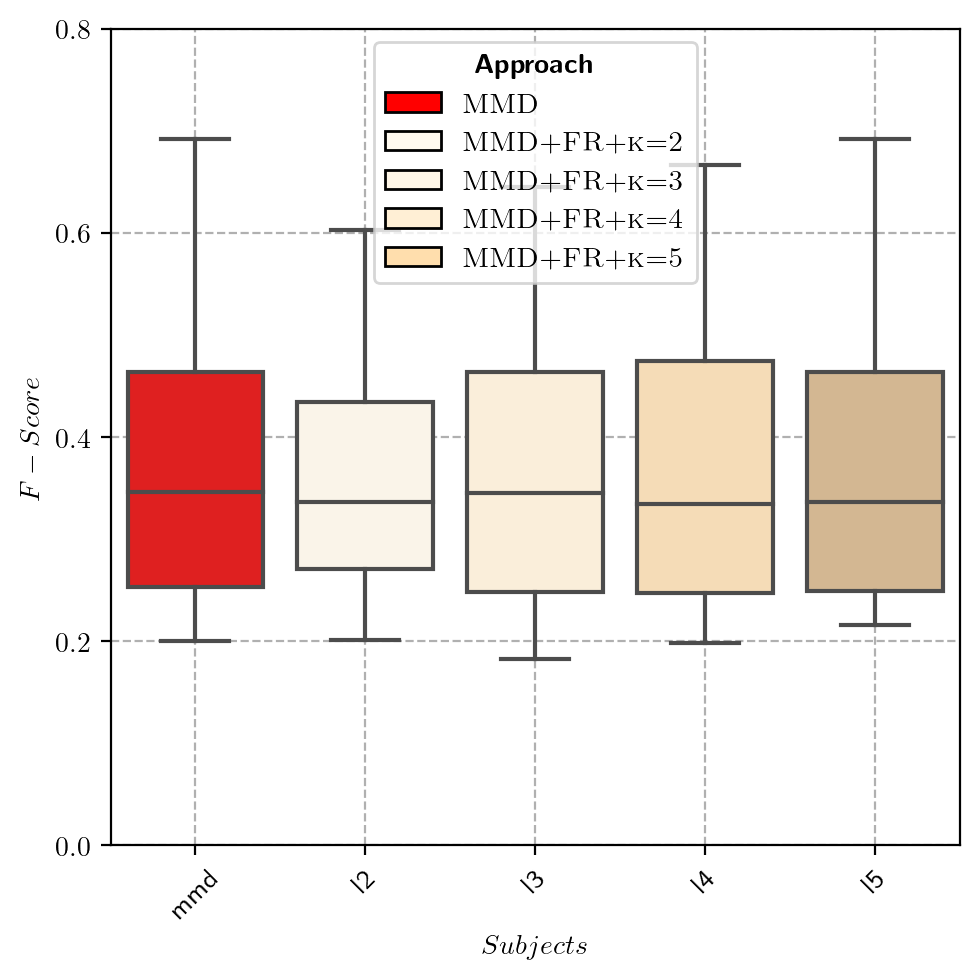

In [29]:
# Create the box plot
plt.figure(figsize=(5, 5), dpi=200)
plt.rcParams['text.usetex'] = True

# Define the colors
palette = {'mmd': 'red','l1': 'floralwhite', 'l2': 'oldlace', 'l3': 'papayawhip', 'l4': 'navajowhite', 'l5': 'burlywood'}

#sns.boxplot(x='blackbox', y='time_with', hue='rules', data=df_mmd_mmd2, palette=palette)
sns.boxplot(x='rules', y='fscore', data=df_mmd_mmd2, palette=palette)
# plt.title('F-score Distribution by Subject for MMD and Our Approach')
plt.grid(axis="y", linestyle='--',)
plt.grid(axis="x", linestyle='--',which='both')
plt.xlabel(r'$Subjects$')
plt.ylabel(r'$F-Score$')
plt.xlabel(r'$Subjects$')
plt.yticks(np.arange(0, 0.81, 0.2))
#plt.ylabel(r'$Time$ $in$ $Seconds$ $(log)$')
#plt.yscale('log')

plt.xticks(rotation=45)
first_patch = mpatches.Patch(ec="black" ,facecolor='red')

second_patch = mpatches.Patch(ec="black" ,facecolor='floralwhite')
third_patch = mpatches.Patch(ec="black" ,facecolor='oldlace')
fourth_patch = mpatches.Patch(ec="black" ,facecolor='papayawhip')
fith_patch = mpatches.Patch(ec="black" ,facecolor='navajowhite')
sixth_patch = mpatches.Patch(ec="black" ,facecolor='burlywood')

plt.legend(title=r'\textbf{Approach}', labels=[r'\scshape{MMD}', r'\scshape{MMD+FR+k=2}', r'\scshape{MMD+FR+k=3}', r'\scshape{MMD+FR+k=4}', r'\scshape{MMD+FR+k=5}'], handles=[first_patch,second_patch, third_patch, fourth_patch, fith_patch, sixth_patch])
# plt.legend(handles=[first_patch, second_patch])
plt.tight_layout()
plt.savefig('./k-fscore.png')